# Exercise 8
Diogo Gomes nº26843

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.inspection import PartialDependenceDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import statsmodels.api as sm

### 1. Run a simple linear regression relating the species richness with each one of the continuous environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the variables requires to be transformed and apply the appropriate transformation. Compute the regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.

In [3]:
# Load dataset
df = pd.read_csv('EFIplus_medit.csv', sep=';')

Altitude: transformed with Yeo-Johnson
Actual_river_slope: transformed with Yeo-Johnson
Elevation_mean_catch: transformed with Yeo-Johnson
prec_ann_catch: transformed with Yeo-Johnson
temp_ann: transformed with Yeo-Johnson
temp_jan: transformed with Yeo-Johnson
temp_jul: transformed with Yeo-Johnson

Simple Linear Regression Results:

Variable: Altitude
Coefficient: -0.9541
R-squared: 0.1094
F-statistic: 591.71 (p=2.244e-123)


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5011.
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/1413261611.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient: {model.params[1]:.4f}")


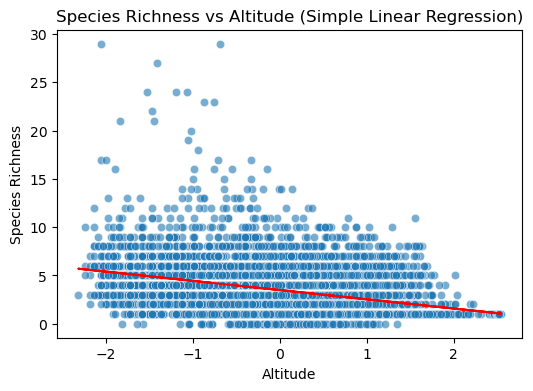

/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/1413261611.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient: {model.params[1]:.4f}")



Variable: Actual_river_slope
Coefficient: -1.0497
R-squared: 0.1352
F-statistic: 752.86 (p=3.948e-154)


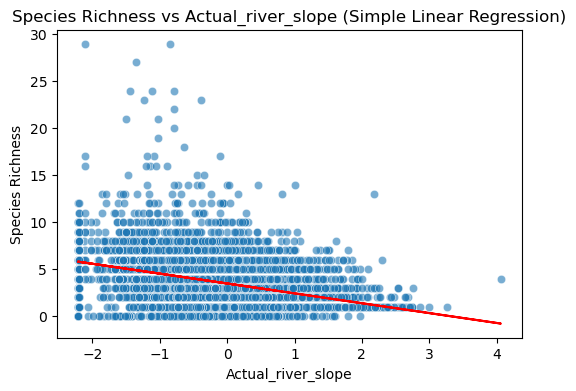


Variable: Elevation_mean_catch
Coefficient: -0.6538
R-squared: 0.0523
F-statistic: 266.00 (p=2.998e-58)


/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/1413261611.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient: {model.params[1]:.4f}")


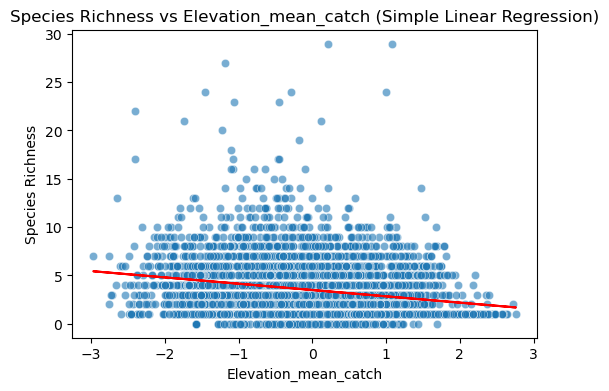


Variable: prec_ann_catch
Coefficient: -0.4288
R-squared: 0.0225
F-statistic: 110.81 (p=1.236e-25)


/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/1413261611.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient: {model.params[1]:.4f}")


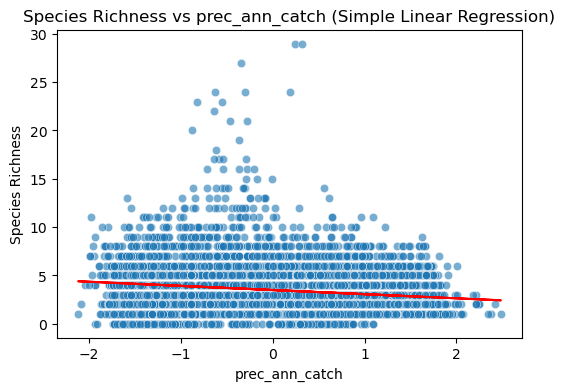


Variable: temp_ann
Coefficient: 0.8800
R-squared: 0.0947
F-statistic: 503.89 (p=3.201e-106)


/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/1413261611.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient: {model.params[1]:.4f}")


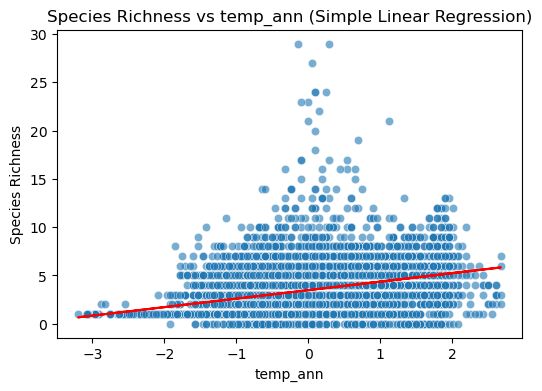


Variable: temp_jan
Coefficient: 0.5786
R-squared: 0.0411
F-statistic: 206.26 (p=7.861e-46)


/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/1413261611.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient: {model.params[1]:.4f}")


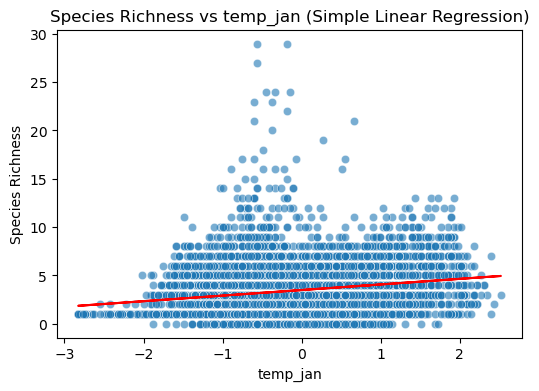


Variable: temp_jul
Coefficient: 0.9074
R-squared: 0.1006
F-statistic: 538.55 (p=5.035e-113)


/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/1413261611.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coefficient: {model.params[1]:.4f}")


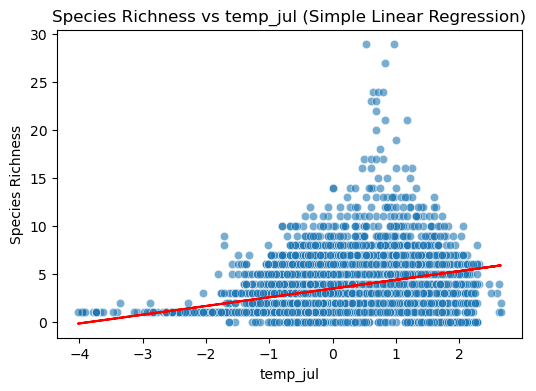

In [4]:
# Define continuous environmental variables
cont_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
             'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Step 3 from previous exercise. create species richness
species_start_col = df.columns.get_loc('Abramis brama') if 'Abramis brama' in df.columns else None
if species_start_col is None:
    species_start_col = df.columns.get_loc('temp_jul') + 1
species_cols = df.columns[species_start_col:]
df['species_richness'] = df[species_cols].sum(axis=1)

# Function to check if transformation needed using Shapiro-Wilk normality test
def needs_transform(series):
    # Test normality on original data
    stat, p = shapiro(series.dropna())
    if p < 0.05:
        return True
    else:
        return False

# Apply transformation (Yeo-Johnson) if needed and store transformed variables
pt = PowerTransformer(method='yeo-johnson')
transformed_vars = {}
for var in cont_vars:
    data = df[var].values.reshape(-1,1)
    if needs_transform(df[var]):
        transformed = pt.fit_transform(data).flatten()
        transformed_vars[var] = transformed
        print(f"{var}: transformed with Yeo-Johnson")
    else:
        transformed_vars[var] = df[var].values
        print(f"{var}: no transformation needed")

# Prepare DataFrame with transformed variables
df_transformed = pd.DataFrame({var: transformed_vars[var] for var in cont_vars})
df_transformed['species_richness'] = df['species_richness'].values

# Remove inf/-inf and NaNs from the DataFrame before regression
df_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)
df_transformed_clean = df_transformed.dropna(subset=cont_vars + ['species_richness'])

# linear regressions for each variable
print("\nSimple Linear Regression Results:")
simple_results = {}
for var in cont_vars:
    X = df_transformed_clean[var]
    y = df_transformed_clean['species_richness']
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    simple_results[var] = model
    print(f"\nVariable: {var}")
    print(f"Coefficient: {model.params[1]:.4f}")
    print(f"R-squared: {model.rsquared:.4f}")
    print(f"F-statistic: {model.fvalue:.2f} (p={model.f_pvalue:.4g})")
    
    # Plot
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X, y=y, alpha=0.6)
    plt.plot(X, model.predict(X_const), color='red')
    plt.title(f'Species Richness vs {var} (Simple Linear Regression)')
    plt.xlabel(var)
    plt.ylabel('Species Richness')
    plt.show()


### 2. Now try to run a multiple linear regression with the same data and check the differences between the previous univariate regression coefficients and the new coefficients. Plot the partial dependence plots to compare responses with the previous single effects.


Multiple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     251.6
Date:                Sat, 17 May 2025   Prob (F-statistic):          3.72e-320
Time:                        11:15:15   Log-Likelihood:                -11144.
No. Observations:                4819   AIC:                         2.230e+04
Df Residuals:                    4811   BIC:                         2.235e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

/var/folders/kd/4r8kz2pd215cjlt29s2n99vh0000gn/T/ipykernel_32131/2129679181.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Simple_coef': [simple_results[var].params[1] for var in cont_vars],


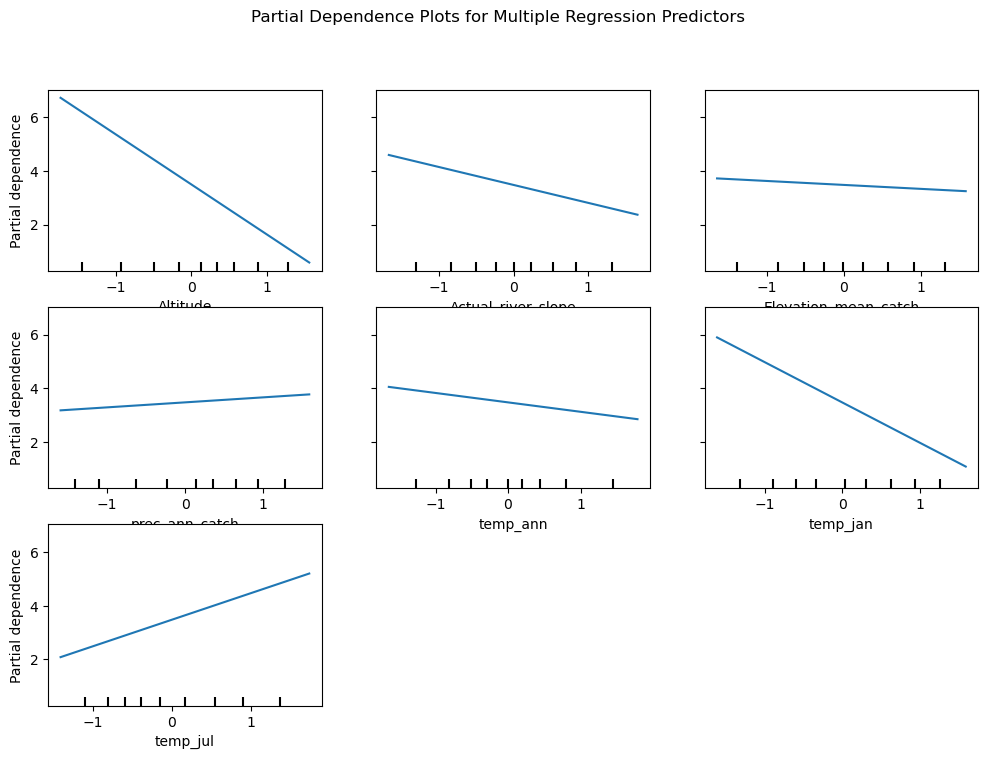

In [5]:
X_multi = df_transformed_clean[cont_vars]
y_multi = df_transformed_clean['species_richness']
X_multi_const = sm.add_constant(X_multi)
multi_model = sm.OLS(y_multi, X_multi_const).fit()

print("\nMultiple Linear Regression Results:")
print(multi_model.summary())

# Compare coefficients with simple regressions
print("\nComparison of coefficients (Simple vs Multiple):")
coef_comparison = pd.DataFrame({
    'Simple_coef': [simple_results[var].params[1] for var in cont_vars],
    'Multiple_coef': multi_model.params[1:]
}, index=cont_vars)
print(coef_comparison)

# Partial dependence plots for multiple regression predictors
# Using sklearn's LinearRegression to fit for PDP plotting
lr = LinearRegression()
lr.fit(X_multi, y_multi)

fig, ax = plt.subplots(figsize=(12,8))
PartialDependenceDisplay.from_estimator(lr, X_multi, features=range(len(cont_vars)), feature_names=cont_vars, ax=ax)
plt.suptitle('Partial Dependence Plots for Multiple Regression Predictors')
plt.show()

### 3. Check the multicolinearity among the predictor variables and run a second more parsimonious regression model. Check how the coefficients have changed.


Variance Inflation Factors:
                feature        VIF
0                 const   1.000313
1              Altitude   5.555717
2    Actual_river_slope   1.280092
3  Elevation_mean_catch   4.761614
4        prec_ann_catch   2.415607
5              temp_ann  40.470933
6              temp_jan  21.794569
7              temp_jul  13.355740

Variables with high multicollinearity to drop: ['Altitude', 'temp_ann', 'temp_jan', 'temp_jul']

Parsimonious Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     296.5
Date:                Sat, 17 May 2025   Prob (F-statistic):          1.30e-176
Time:                        11:15:16   Log-Likelihood:                -11487.
No. Observations:                4819   AI

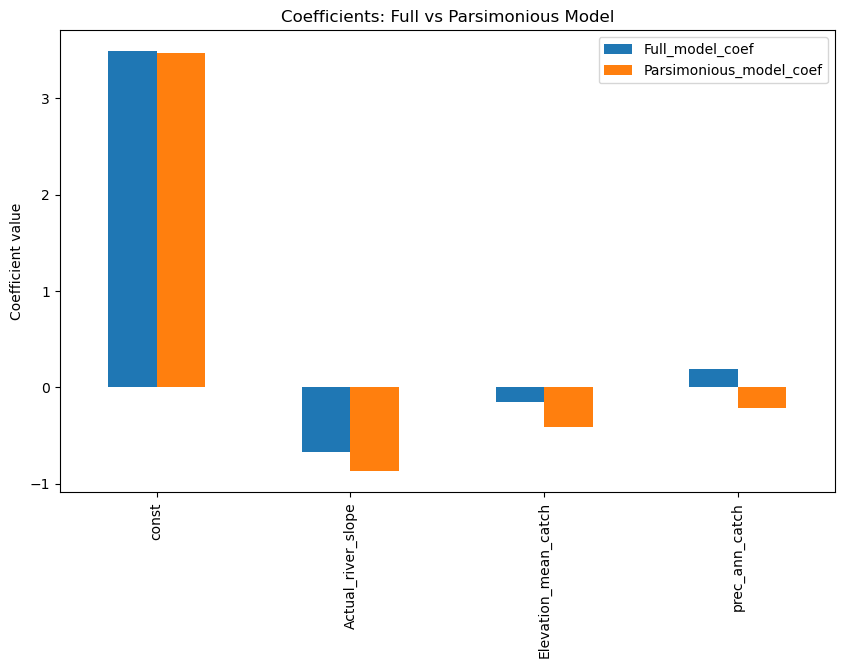

In [6]:
X_vif = X_multi_const.copy()
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Drop variables with high VIF (>5 or >10), here let's drop those >5 except intercept
high_vif_vars = vif_data[vif_data['VIF'] > 5]['feature'].tolist()
high_vif_vars = [var for var in high_vif_vars if var != 'const']
print("\nVariables with high multicollinearity to drop:", high_vif_vars)

X_parsimonious = X_multi.drop(columns=high_vif_vars)
X_parsimonious_const = sm.add_constant(X_parsimonious)
parsimonious_model = sm.OLS(y_multi, X_parsimonious_const).fit()

print("\nParsimonious Multiple Regression Results:")
print(parsimonious_model.summary())

# Compare coefficients between full and parsimonious models
coef_compare_parsimonious = pd.DataFrame({
    'Full_model_coef': multi_model.params.reindex(X_parsimonious_const.columns),
    'Parsimonious_model_coef': parsimonious_model.params
})
print("\nCoefficient comparison (Full vs Parsimonious):")
print(coef_compare_parsimonious)

# Plot coefficients comparison
coef_compare_parsimonious.plot(kind='bar', figsize=(10,6), title='Coefficients: Full vs Parsimonious Model')
plt.ylabel('Coefficient value')
plt.show()